In [6]:
from __future__ import division, print_function

import sys, os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# Generate test data

First, a function to generate 'straight', perfectly regular onsets over a 45-second interval.

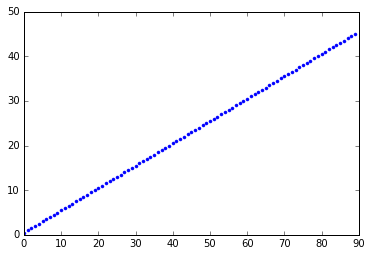

In [127]:
def ons_straight(ioi=0.5, length=45, noise=0.01):
    n = int(length / ioi)
    ioi_straight = ioi * np.ones(n)
    ioi_straight += noise * np.random.standard_normal(n)
    return np.cumsum(ioi_straight), ioi_straight
plt.plot(ons_straight()[0], '.')

Also make a function to generate irregular onsets, starting from a list of ioi's uniformly distributed between 0 and 2 * ioi.

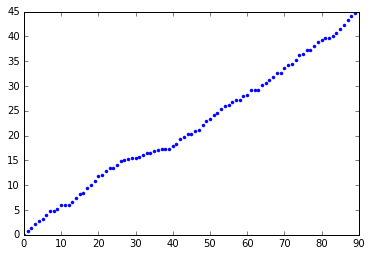

In [128]:
def ons_random(ioi=0.5, length=45):
    ioi_random = 2 * ioi * np.random.rand(int(length / ioi))
    return np.cumsum(ioi_random), ioi_random

plt.plot(ons_random()[0], '.')

Now we generate onset data files for the sections of 4 kinds of songs:
1. all straight
1. 2/3 straight
1. 2/3 random
1. all random

In [129]:
data_dir = os.path.abspath('.')
onset_dir = data_dir + '/onsets/'
onset_dir

'/Users/Jan/Documents/Work/Code/catchy/test/onsets/'

In [130]:
def write_onsets(file_id, times, intervals, ext='.csv', delimiter=','):
    path = os.path.join(onset_dir, file_id + ext)
    data = np.array([times, intervals]).T
    np.savetxt(path, data, delimiter=delimiter)
    
write_onsets('0-0', *ons_straight())
write_onsets('0-1', *ons_straight())
write_onsets('0-2', *ons_straight())

write_onsets('1-0', *ons_straight())
write_onsets('1-1', *ons_straight())
write_onsets('1-2', *ons_random())

write_onsets('2-0', *ons_straight())
write_onsets('2-1', *ons_random())
write_onsets('2-2', *ons_random())

write_onsets('3-0', *ons_random())
write_onsets('3-1', *ons_random())
write_onsets('3-2', *ons_random())

# Analyse

In [131]:
# this might not be needed if onset_dir contains only data
# it would definitely not be needed if rhythm_features.compute_and_write knew how to ignore dirs and non-data files
# (and it could be made easier if utils.dataset_from_dir were more flexible)

track_list = [os.path.basename(f).strip('.csv') for f in os.listdir(onset_dir) if f.endswith('.csv')]
track_list

['0-0',
 '0-1',
 '0-2',
 '1-0',
 '1-1',
 '1-2',
 '2-0',
 '2-1',
 '2-2',
 '3-0',
 '3-1',
 '3-2']

In [132]:
# this could be made easier by modifying utils.dataset_from_dir

song_dict = {}
for t in track_list:
    s = t.split('-')[0]
    if s in song_dict:
        song_dict[s].append(t)
    else:
        song_dict[s] = [t]
song_dict

{'0': ['0-0', '0-1', '0-2'],
 '1': ['1-0', '1-1', '1-2'],
 '2': ['2-0', '2-1', '2-2'],
 '3': ['3-0', '3-1', '3-2']}

In [133]:
sys.path.append("/Users/Jan/Documents/Work/Code")
from catchy import rhythm_features

reload(rhythm_features)
rhythm_features.onsets_dir = onset_dir

features = {'ioii': (rhythm_features.ioii, {'normalize_ioi': False})}

# 'tempo': (rhythm_features.local_tempo, {}),
# 'log_norm_ioi': (rhythm_features.log_ioi, {'normalize_ioi': True}),
# 'log_norm_ioi_hist': (rhythm_features.ioi_histogram, {'min_length': -3, 'max_length': 3, 'step': 0.5})

rhythm_features.compute_and_write(data_dir, track_list=track_list, features=features)

Computing features for track 0-0...
Computing features for track 0-1...
Computing features for track 0-2...
Computing features for track 1-0...
Computing features for track 1-1...
Computing features for track 1-2...
Computing features for track 2-0...
Computing features for track 2-1...
Computing features for track 2-2...
Computing features for track 3-0...
Computing features for track 3-1...
Computing features for track 3-2...


In [134]:
from catchy import feature_transforms

feature_transforms.data_dir = data_dir

features = [
#     'log_norm_ioi.mean',
#     'log_norm_ioi.mean.corpus.pdf.rank.logit',
#     'log_norm_ioi.mean.song.pdf.rank.logit',
#     'log_norm_ioi.std',
#     'log_norm_ioi.std.corpus.pdf.rank.logit',
#     'log_norm_ioi.std.song.pdf.rank.logit',

#     'tempo.mean',
#     'tempo.mean.corpus.pdf.rank.logit',
#     'tempo.mean.song.pdf.rank.logit',
#     'tempo.std',
#     'tempo.std.corpus.pdf.rank.logit',
#     'tempo.std.song.pdf.rank.logit',
    
#     'log_norm_ioi_hist.corpus.information',
#     'log_norm_ioi_hist.corpus.tau',
#     'log_norm_ioi_hist.song.information',
#     'log_norm_ioi_hist.song.tau',
#     'log_norm_ioi_hist.normentropy.minlog',
#     'log_norm_ioi_hist.normentropy.minlog.corpus.pdf.rank.logit',
#     'log_norm_ioi_hist.normentropy.minlog.song.pdf.rank.logit',
    
    # below should be equivalent to RPVI
    'ioii.mean',
    'ioii.mean.corpus.pdf.rank.logit',
    'ioii.mean.song.pdf.rank.logit',
]

data = feature_transforms.compute(song_dict, features)

computing ioii.mean...
computing ioii.mean.corpus.pdf.rank.logit...
computing ioii.mean.song.pdf.rank.logit...


In [135]:
data

,ioii.mean,ioii.mean.corpus.pdf.rank.logit,ioii.mean.song.pdf.rank.logit,segment.id,song.id
0,0.011241,1.945910,1.609438,1-0,1
1,0.010521,0.887303,0.000000,1-1,1
2,0.323614,0.167054,-1.609438,1-2,1
3,0.010260,0.510826,0.000000,0-0,0
4,0.012308,3.135494,1.609438,0-1,0
5,0.009087,-1.335001,-1.609438,0-2,0
6,0.354934,-0.167054,0.000000,3-0,3
7,0.318620,-0.887303,1.609438,3-1,3
8,0.367006,-1.945910,-1.609438,3-2,3
9,0.010823,1.335001,-1.609438,2-0,2


# Check results

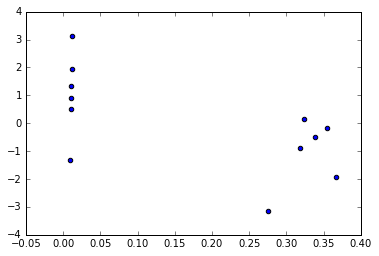

In [140]:
plt.scatter(data['ioii.mean'], data['ioii.mean.corpus.pdf.rank.logit'])

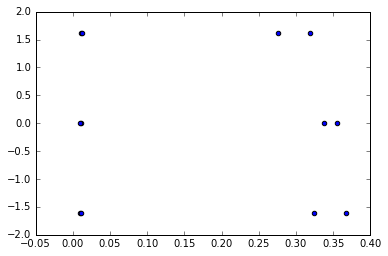

In [139]:
plt.scatter(data['ioii.mean'], data['ioii.mean.song.pdf.rank.logit'])